# Real-time Fake News Detection using Big Data and Machine Learning

In [8]:
!pip install nltk spacy wordcloud scikit-learn matplotlib pillow
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Loading Datasets

In [11]:
import pandas as pd

# Load datasets
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

# Add labels
fake_df["label"] = 0  # FAKE
true_df["label"] = 1  # REAL

# Display first row of each as a neat table
from IPython.display import display

print("Fake News Example:")
display(fake_df.head(5))

print("Real News Example:")
display(true_df.head(5))


Fake News Example:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Real News Example:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# Combining the datasets

In [17]:
import pandas as pd

# Combine the datasets
df = pd.concat([fake_df, true_df], ignore_index=True)

# Reset column names (in case there are spaces)
df.columns = df.columns.str.strip()

# Display first 5 rows
print("First 5 rows of the combined dataset:")
display(df.head(5))

# Display last 5 rows
print("Last 5 rows of the combined dataset:")
display(df.tail(5))

# Optional: print shape
print(f"\n Combined dataset shape: {df.shape}")


First 5 rows of the combined dataset:


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Last 5 rows of the combined dataset:


,title,text,subject,date,label
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1



 Combined dataset shape: (44898, 5)


# Data Exploring & Data Preprocessing

News Category Counts:
 - Fake: 23481
 - Real: 21417


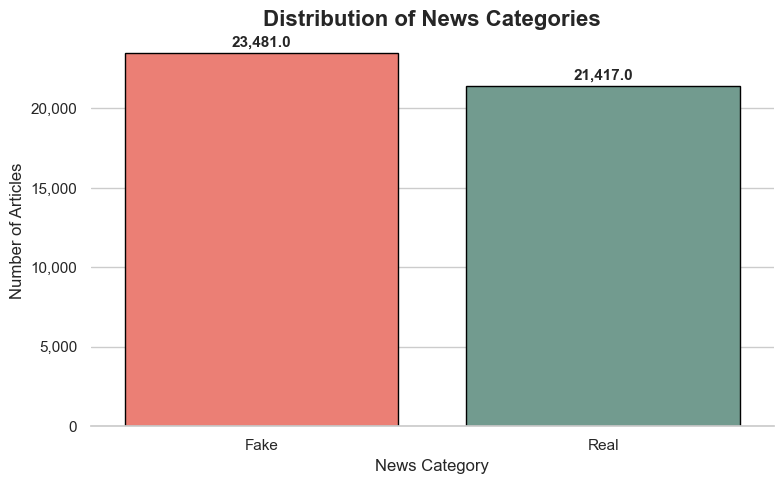

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Use seaborn's built-in clean style
sns.set(style="whitegrid")

# Map numeric labels to readable text
df['category'] = df['label'].map({0: 'Fake', 1: 'Real'})

# Count values
category_counts = df['category'].value_counts()
print("News Category Counts:")
for category, count in category_counts.items():
    print(f" - {category}: {count}")

# Set figure size
plt.figure(figsize=(8, 5))

# Draw bar plot
palette = {"Fake": "#FF6F61", "Real": "#6BA292"}  # Custom colors
graph = sns.countplot(
    x="category",
    hue="category",
    data=df,
    palette=palette,
    legend=False,
    edgecolor="black"
)

# Titles and labels
plt.title("Distribution of News Categories", fontsize=16, fontweight='bold')
plt.xlabel("News Category", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)

# Clean up borders
graph.spines["top"].set_visible(False)
graph.spines["right"].set_visible(False)
graph.spines["left"].set_visible(False)

# Format y-axis with thousands separator
graph.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Annotate bars
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 400, f"{height:,}", 
               ha="center", fontsize=11, fontweight='bold')

# Tight layout
plt.tight_layout()
plt.show()

News Subjects and Their Counts:
 - politicsNews: 11272
 - worldnews: 10145
 - News: 9050
 - politics: 6841
 - left-news: 4459
 - Government News: 1570
 - US_News: 783
 - Middle-east: 778


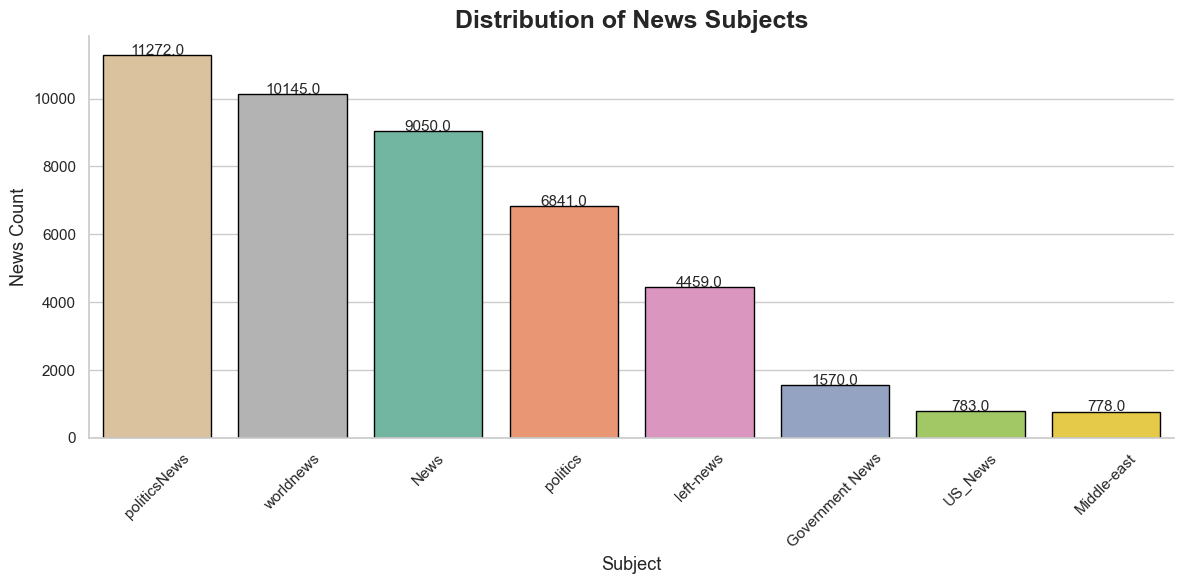

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each subject
subject_counts = df['subject'].value_counts()
print("News Subjects and Their Counts:")
for subject, count in subject_counts.items():
    print(f" - {subject}: {count}")

# Define color palette
colors = sns.color_palette("Set2", len(subject_counts))

# Create the count plot
plt.figure(figsize=(12, 6))
graph = sns.countplot(
    x='subject',
    hue='subject',  # fixes FutureWarning
    data=df,
    palette=colors,
    order=subject_counts.index,
    edgecolor='black',
    legend=False    # hides legend since x and hue are the same
)

# Plot customization
plt.title("Distribution of News Subjects", fontsize=18, fontweight='bold')
plt.xlabel("Subject", fontsize=13)
plt.ylabel("News Count", fontsize=13)
plt.xticks(rotation=45)
sns.despine()

# Annotate each bar with count
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 0.5, height, ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# Cleaning 
Checking the missing values in each columns

In [101]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

title      0.0
text       0.0
subject    0.0
date       0.0
label      0.0
dtype: float64

# Checking empty/whitespace-only texts

In [103]:
# List to store indexes of empty or whitespace-only rows
blanks = []

# Iterating through 'text' column to check for empty strings or strings with only spaces
for index, text in df["text"].items():  # Use .items() instead of .iteritems() for iterating through the Series
    if not text or text.isspace():  # Check if the text is empty or contains only spaces
        blanks.append(index)  # Add the index to the 'blanks' list if condition is met

# Check how many empty/whitespace-only texts are there
print(f"Number of empty or whitespace-only rows in 'text' column: {len(blanks)}")

Number of empty or whitespace-only rows in 'text' column: 631


# 1. Remove Empty or Whitespace-Only Texts

In [105]:
# 1. Remove Empty or Whitespace-Only Texts
# Identify and remove rows where 'text' column is empty or contains only whitespace
df = df.dropna(subset=['text'])  # Remove any rows where 'text' is NaN
df = df[~df['text'].str.isspace()]  # Remove rows where 'text' contains only spaces
print(f"Rows after removing empty or whitespace-only texts: {len(df)}")

Rows after removing empty or whitespace-only texts: 44267


# 2. Remove Duplicates

In [107]:
# 2. Remove Duplicates
# Remove duplicate rows based on 'text' column
df = df.drop_duplicates(subset=['text'])
print(f"Rows after removing duplicates: {len(df)}")

Rows after removing duplicates: 38644


# 3. Lowercase Conversion

In [109]:
# 3. Lowercase Conversion
# Convert all text to lowercase to standardize it
df['text'] = df['text'].str.lower()
print("First few rows after lowercase conversion:")
print(df['text'].head())

First few rows after lowercase conversion:
0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday, it was revealed that former milwauk...
3    on christmas day, donald trump announced that ...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object


# 4. Remove Special Characters, Numbers, and Punctuation

In [111]:
import re  # Importing the 're' module for regular expressions

# 4. Remove Special Characters, Numbers, and Punctuation
# Remove unwanted characters using regular expressions
def clean_text(text):
    # Removing any special characters and digits
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    text = re.sub('[^A-Za-z0-9]+', ' ', text)  # Remove anything that isn't a letter or number
    return text

df['text'] = df['text'].apply(clean_text)
print("First few rows after removing special characters, numbers, and punctuation:")
print(df['text'].head())  # Show the first few rows after cleaning

First few rows after removing special characters, numbers, and punctuation:
0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday it was revealed that former milwauke...
3    on christmas day donald trump announced that h...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object


# 5. Remove Stop Words

In [113]:
# 5. Remove Stop Words
# Remove stop words (commonly used words that don’t contribute much to the meaning of the text)
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Remove stopwords from the text
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)
print("First few rows after removing stop words:")
print(df['text'].head())


First few rows after removing stop words:
0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object


# lemmatization

In [29]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Lemmatization function using spaCy
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization
df['text'] = df['text'].apply(lemmatize_text)

# Show sample results
print("First few rows after lemmatization:")
print(df['text'].head())


First few rows after lemmatization:
0    donald trump send embarrass new year eve messa...
1    drunk bragging trump staffer start russian col...
2    sheriff david clarke become internet joke thre...
3    trump obsess even obama name code website imag...
4    pope francis call donald trump christmas speec...
Name: text, dtype: object


# Visualisation

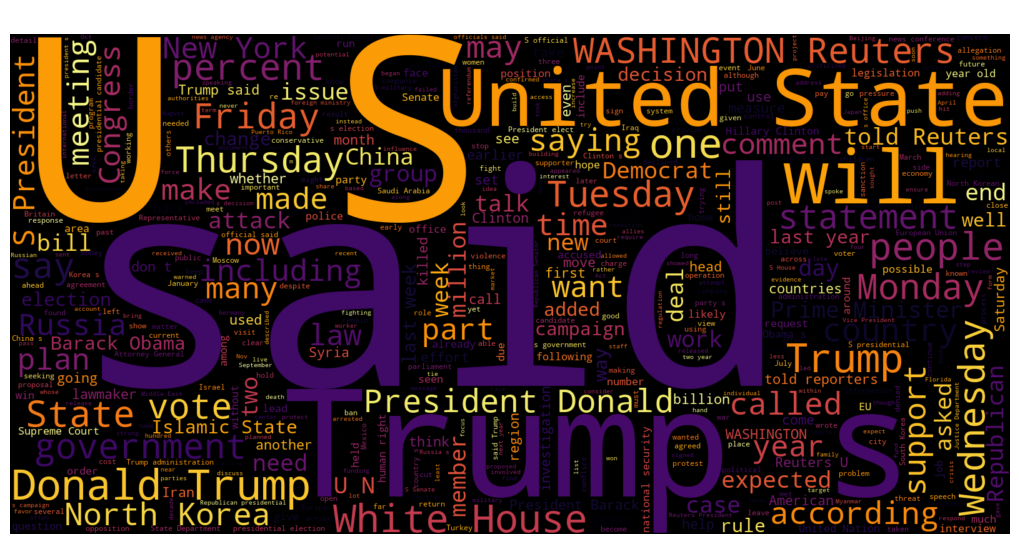

In [133]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get all the text from true news articles
true_news_text = " ".join(true_df['text'].dropna().astype(str))

# Generate the word cloud with custom colors and a centered display
plt.figure(figsize=(10, 8))

# WordCloud configuration with a vibrant colormap and black background
wordcloud = WordCloud(
    max_words=500,  # Top 500 words
    width=1600,  # Set width
    height=800,  # Set height
    background_color='black',  # Black background
    colormap='inferno',  # Use a vibrant 'inferno' colormap
    contour_color='white',  # White contour for better visibility
    contour_width=1,  # Set contour width
).generate(true_news_text)

# Display the word cloud with interpolation for smooth edges
plt.imshow(wordcloud, interpolation='bilinear')

# Hide axis for a clean look
plt.axis("off")

# Set title with white color and bold font
plt.title("True News WordCloud (Top 2000 Words)", fontsize=16, fontweight='bold', color='white')

# Center the plot by adjusting the layout
plt.tight_layout(pad=0)

# Show the plot
plt.show()

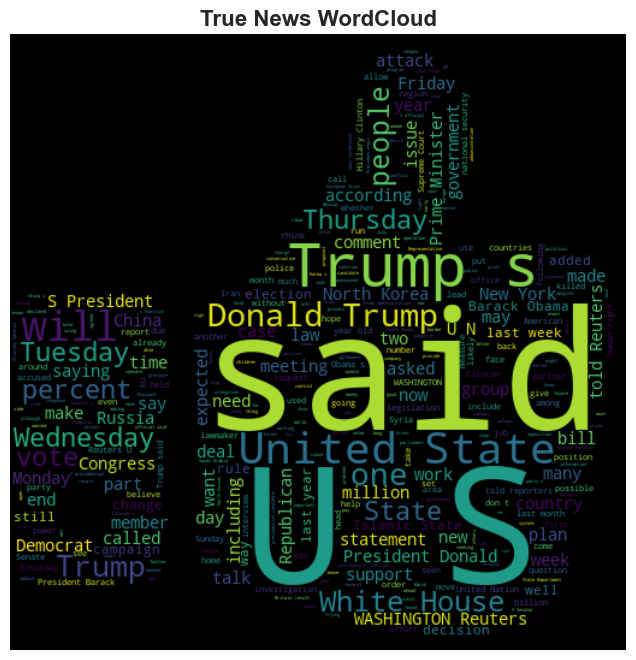

In [151]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the thumb-up icon image as a mask
thumb_path = "thumb-up.png" 
icon = Image.open(thumb_path)

# Convert the image to RGBA (Red, Green, Blue, Alpha for transparency)
icon = icon.convert("RGBA")  # Convert to RGBA

# Create a mask from the icon
mask = np.array(icon.convert("L"))  # Convert the RGBA image to grayscale (L mode)

# Load the true news text
true_news_text = " ".join(true_df['text'].dropna().astype(str))

# Generate the word cloud using the thumb-up icon mask
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(mask=mask, max_words=2000, background_color='black').generate(true_news_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("True News WordCloud", fontsize=16, fontweight='bold')
plt.show()


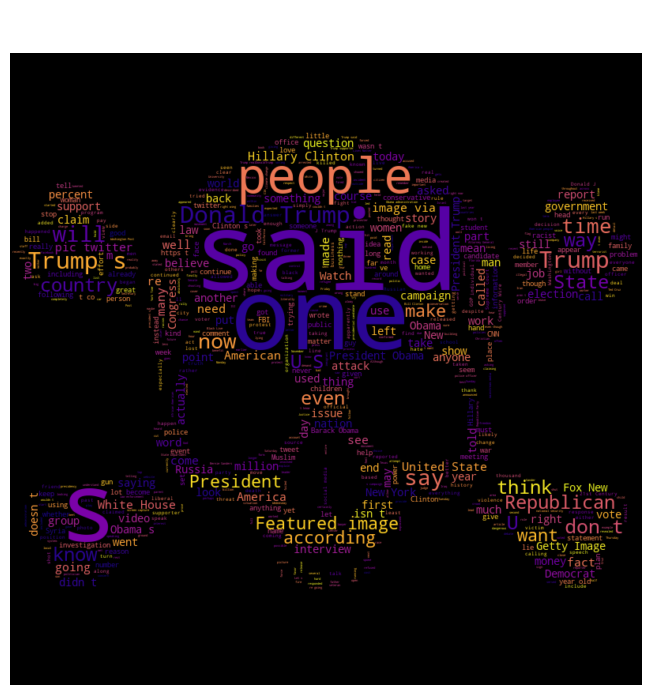

In [185]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the skull icon image as a mask
skull_path = "skulls.png"
icon = Image.open(skull_path)

# Convert the skull image to grayscale (to create a binary mask)
icon = icon.convert("L")  # Convert to grayscale

# Create a binary mask where non-white pixels are 1 and white pixels are 0
mask = np.array(icon)
mask[mask > 200] = 255  # Threshold the image to get a clean mask
mask[mask <= 200] = 0

# Get all the text from fake news articles
fake_news_text = " ".join(fake_df['text'].dropna().astype(str))

# Generate the word cloud considering the top 2000 words and applying the skull mask
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(max_words=2000, mask=mask, width=1600, height=800, background_color='black', colormap='plasma').generate(fake_news_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Adjust the title's position and appearance
plt.title("Fake News WordCloud", fontsize=16, fontweight='bold', color='white', pad=20)

# Adjust layout to make room for title
plt.subplots_adjust(top=0.9)

# Show the word cloud
plt.show()

# Feature Extraction

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Combine the data from both fake and real news
df = pd.concat([fake_df[['text', 'label']], true_df[['text', 'label']]])

# Extract text (features) and labels
X = df['text']
y = df['label']

# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TfidfVectorizer for feature extraction
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Model Evaluation:
Accuracy: 0.9858574610244989
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Support Vector Machine (SVM)

In [195]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm = SVC(kernel='linear')  # Linear kernel for text classification
svm.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate the model
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Model Evaluation:
Accuracy: 0.9929844097995546
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [199]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 2.6 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.7 MB/s eta 0:00:00a 0:00:01


# Tokenized sequences and word embeddings

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Input(shape=(200,)))  # First layer defines the input shape
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Combine fake and real news
df = pd.concat([fake_df[['text', 'label']], true_df[['text', 'label']]])

# Features and labels
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=5000, lower=True, split=" ")
tokenizer.fit_on_texts(X_train)

# Sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=200, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=200, padding='post')

In [41]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 161ms/step - accuracy: 0.8341 - loss: 0.3559 - val_accuracy: 0.9805 - val_loss: 0.0720
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 74s 166ms/step - accuracy: 0.9791 - loss: 0.0810 - val_accuracy: 0.9848 - val_loss: 0.0571
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.9792 - loss: 0.0770 - val_accuracy: 0.9676 - val_loss: 0.1048
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 74s 166ms/step - accuracy: 0.9788 - loss: 0.0756 - val_accuracy: 0.9857 - val_loss: 0.0580
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 162ms/step - accuracy: 0.9944 - loss: 0.0268 - val_accuracy: 0.9805 - val_loss: 0.0723


# LSTM (Long Short-Term Memory)

281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step
LSTM Model Evaluation
Accuracy: 0.9798440979955456

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      4733
           1       0.98      0.97      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980


Confusion Matrix:
 [[4670   63]
 [ 118 4129]]


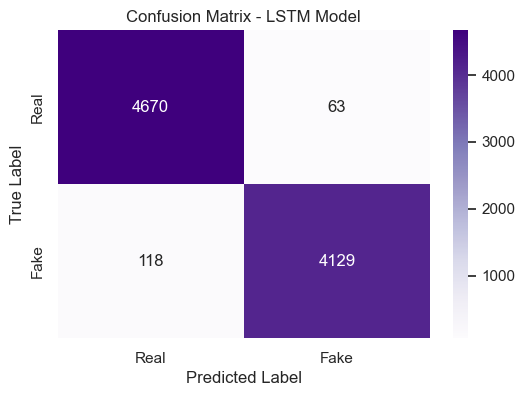

In [43]:
# Predict on test data using LSTM model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate accuracy and print metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("LSTM Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compute and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM Model')
plt.show()

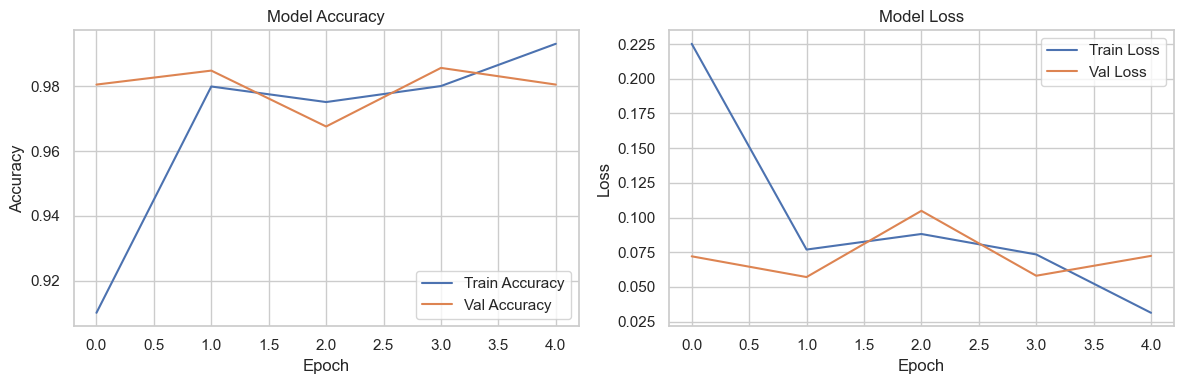

In [45]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# GRU (Gated Recurrent Unit)

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dropout, Dense

model_gru = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    GRU(128),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_gru.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 160ms/step - accuracy: 0.8250 - loss: 0.3926 - val_accuracy: 0.9509 - val_loss: 0.1246
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.9718 - loss: 0.0790 - val_accuracy: 0.9894 - val_loss: 0.0341
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 76s 169ms/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.9896 - val_loss: 0.0340
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.9989 - loss: 0.0053 - val_accuracy: 0.9932 - val_loss: 0.0251
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9915 - val_loss: 0.0376


281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
GRU Model Evaluation
Accuracy: 0.9902004454342984

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4699   34]
 [  54 4193]]


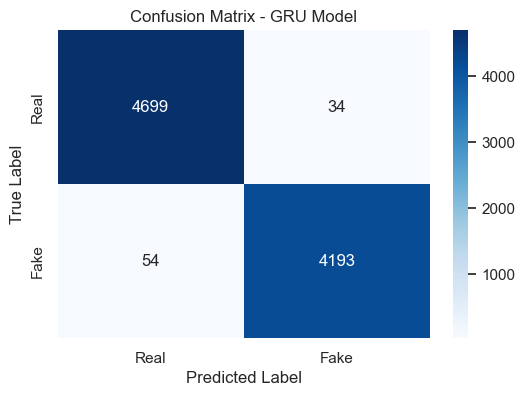

In [37]:
# Predict on test data using GRU model
y_pred_prob_gru = model_gru.predict(X_test_pad)
y_pred_gru = (y_pred_prob_gru > 0.5).astype("int32")

# Evaluate accuracy and print metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("GRU Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_gru))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gru))

# Compute and print confusion matrix
cm = confusion_matrix(y_test, y_pred_gru)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - GRU Model')
plt.show()

In [31]:
history_gru = model_gru.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 96s 214ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9922 - val_loss: 0.0289
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 94s 208ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9928 - val_loss: 0.0337
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9930 - val_loss: 0.0345
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 178ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9929 - val_loss: 0.0379
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 197ms/step - accuracy: 0.9999 - loss: 3.8154e-04 - val_accuracy: 0.9916 - val_loss: 0.0370


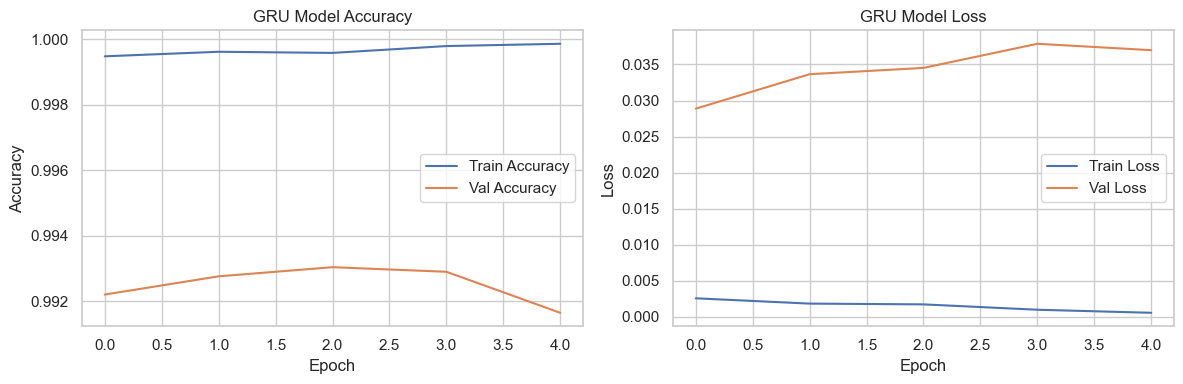

In [35]:
import matplotlib.pyplot as plt

# Plot training history for GRU
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Hyperparameter Tuning with KerasTuner

In [39]:
!pip install keras-tuner --upgrade

In [69]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dropout, Dense
from keras.optimizers import Adam

In [71]:
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, 
                        output_dim=hp.Choice('embedding_dim', [64, 128, 256])))
    model.add(GRU(units=hp.Int('gru_units', min_value=64, max_value=256, step=64)))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [73]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='gru_tuning'
)

Reloading Tuner from kt_dir/gru_tuning/tuner0.json


In [79]:
tuner.search(X_train_pad, y_train, epochs=5, validation_split=0.2, verbose=1)

# Best Hyperparameters Found

In [81]:
from keras.optimizers import Adam

# Get the best hyperparameters (no argument for num_models here)
best_hps = tuner.get_best_hyperparameters()[0]

# Rebuild the model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Compile the model manually to avoid optimizer loading warning
best_model.compile(
    optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Embedding Dim: {best_hps.get('embedding_dim')}")
print(f"GRU Units: {best_hps.get('gru_units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Best Hyperparameters:
Embedding Dim: 64
GRU Units: 256
Dropout Rate: 0.30000000000000004
Learning Rate: 0.001


In [83]:
history_best = best_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 164s 181ms/step - accuracy: 0.8421 - loss: 0.3396 - val_accuracy: 0.9478 - val_loss: 0.1619
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 157s 175ms/step - accuracy: 0.9531 - loss: 0.1379 - val_accuracy: 0.9876 - val_loss: 0.0376
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 159s 177ms/step - accuracy: 0.9936 - loss: 0.0212 - val_accuracy: 0.9925 - val_loss: 0.0221
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 152s 169ms/step - accuracy: 0.9983 - loss: 0.0063 - val_accuracy: 0.9918 - val_loss: 0.0253
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 152s 169ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9930 - val_loss: 0.0282


In [91]:
# Predict on test data using the best model
y_pred_prob_best = best_model.predict(X_test_pad)
y_pred_best = (y_pred_prob_best > 0.5).astype("int32")

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step


# Tuned GRU

Best Model Evaluation
Accuracy: 0.9928730512249443

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4695   38]
 [  26 4221]]


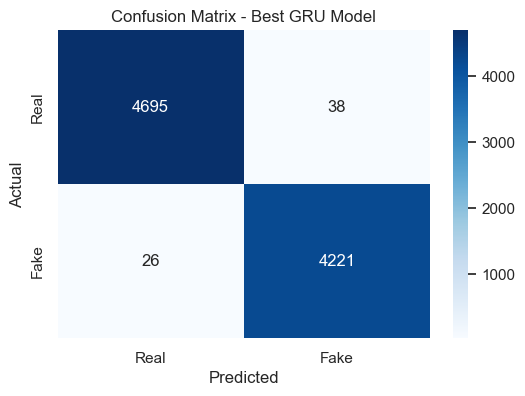

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
print("Best Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# Plot confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best GRU Model')
plt.show()

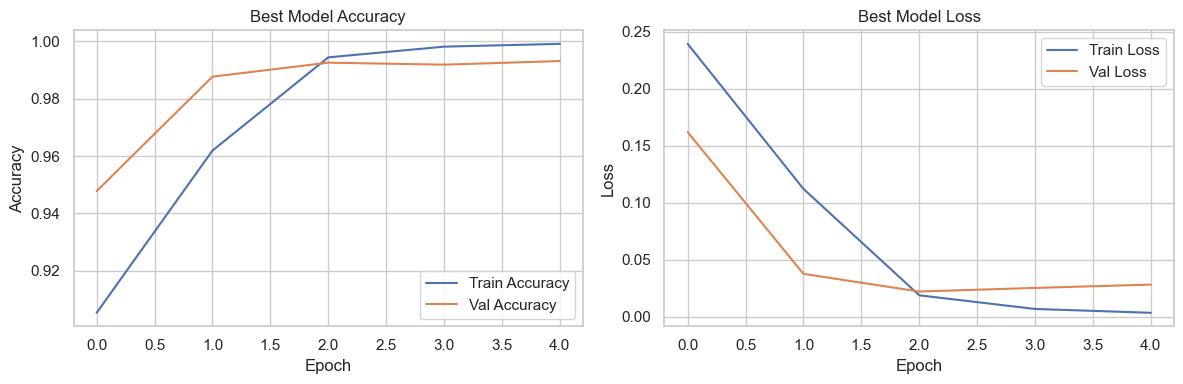

In [89]:
# Plot training history for Best Model
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_best.history['accuracy'], label='Train Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Val Accuracy')
plt.title('Best Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_best.history['loss'], label='Train Loss')
plt.plot(history_best.history['val_loss'], label='Val Loss')
plt.title('Best Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()